In [1]:
# Importons les librairies nécessaires
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler


SEED = 42
plt.style.use("ggplot")
pd.options.display.max_columns = None

In [2]:
# Affichons les données disponibles
!ls data/

NUSW-NB15_features.csv	   UNSW_NB15_testing-set.csv
UNSW-NB15_LIST_EVENTS.csv  UNSW_NB15_training-set.csv


In [3]:
# Chargeons les données de training et de testing
path = "data/"
train_df = pd.read_csv(path+"UNSW_NB15_training-set.csv")
test_df = pd.read_csv(path+"UNSW_NB15_testing-set.csv")

In [4]:
# Affichons la forme et l'entête de la BD de training
print(f"Train shape: {train_df.shape}")
display(train_df.head())

Train shape: (139126, 45)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,Normal,0.0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0.0,43.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,6.0,0.0,Normal,0.0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0.0,7.0,1.0,2.0,1.0,1.0,3.0,0.0,0.0,0.0,2.0,6.0,0.0,Normal,0.0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,0.0,2.0,1.0,0.0,Normal,0.0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0.0,43.0,1.0,2.0,2.0,1.0,40.0,0.0,0.0,0.0,2.0,39.0,0.0,Normal,0.0


In [5]:
# Affichons la forme et l'entête de la BD de testing 
print(test_df.shape)
test_df.head()

(82177, 45)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496.0,0.0,90909.0902,254.0,0.0,180363632.0,0.0,0.0,0.0,0.011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,248.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,Normal,0.0
1,2,0.000008,udp,-,INT,2,0,1762.0,0.0,125000.0003,254.0,0.0,881000000.0,0.0,0.0,0.0,0.008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,881.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,Normal,0.0
2,3,0.000005,udp,-,INT,2,0,1068.0,0.0,200000.0051,254.0,0.0,854400000.0,0.0,0.0,0.0,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,534.0,0.0,0.0,0.0,3.0,2.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,3.0,0.0,Normal,0.0
3,4,0.000006,udp,-,INT,2,0,900.0,0.0,166666.6608,254.0,0.0,600000000.0,0.0,0.0,0.0,0.006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,450.0,0.0,0.0,0.0,3.0,2.0,2.0,2.0,1.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0,Normal,0.0
4,5,0.000010,udp,-,INT,2,0,2126.0,0.0,100000.0025,254.0,0.0,850400000.0,0.0,0.0,0.0,0.010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1063.0,0.0,0.0,0.0,3.0,2.0,2.0,2.0,1.0,3.0,0.0,0.0,0.0,2.0,3.0,0.0,Normal,0.0


## 1. Exploratory Data Analysis

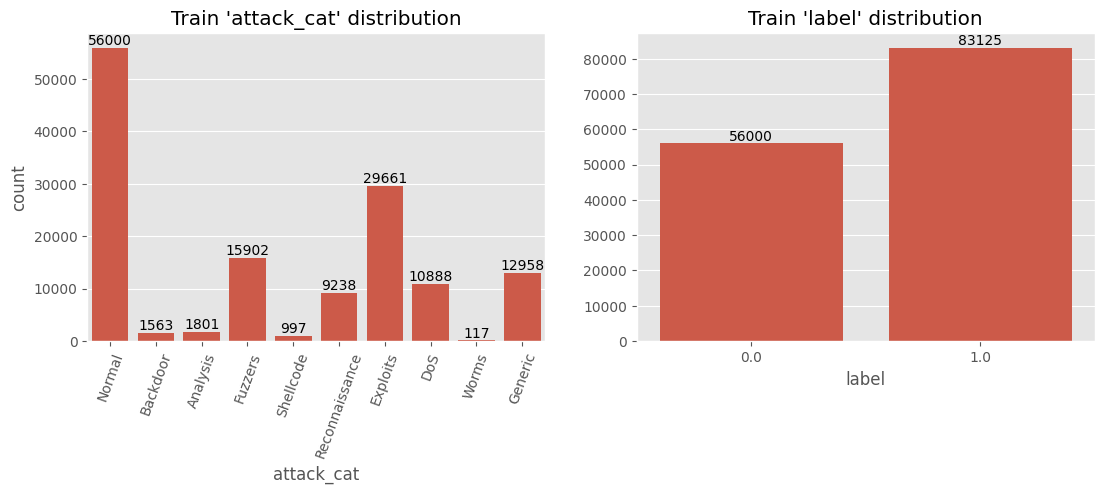

In [6]:
# Dessinons la distribution des modalités des variables réponses "attack_cat" et "label"
plt.figure(figsize=(13, 4))

plt.subplot(121)
ax = sns.countplot(x="attack_cat", data=train_df)
ax.bar_label(ax.containers[0])
ax.tick_params(axis='x', labelrotation=70)
ax.set_title("Train 'attack_cat' distribution")

plt.subplot(122)
ax = sns.countplot(x="label", data=train_df)
ax.bar_label(ax.containers[0])
ax.set_title("Train 'label' distribution")
ax.set_ylabel(None)

plt.savefig("targets.pdf", dpi=500, facecolor="w", bbox_inches="tight")
plt.show()

In [7]:
# Affichons les types de variables pour voir s'ils concordent avec ceux de la description des variables
train_df.dtypes.to_frame().T

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,int64,float64,object,object,object,int64,int64,int64,int64,float64,int64,int64,float64,float64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64


In [8]:
# Regardons les modalités des variables catégorielles
cat_cols = train_df.select_dtypes("object").columns.difference(["attack_cat"])
for col in cat_cols:
    modalities = train_df[col].unique()
    print(f"Column {col} has {len(modalities)}:\ {np.sort(modalities)}")

Column proto has 133:\ ['3pc' 'a/n' 'aes-sp3-d' 'any' 'argus' 'aris' 'arp' 'ax.25' 'bbn-rcc'
 'bna' 'br-sat-mon' 'cbt' 'cftp' 'chaos' 'compaq-peer' 'cphb' 'cpnx'
 'crtp' 'crudp' 'dcn' 'ddp' 'ddx' 'dgp' 'egp' 'eigrp' 'emcon' 'encap'
 'etherip' 'fc' 'fire' 'ggp' 'gmtp' 'gre' 'hmp' 'i-nlsp' 'iatp' 'ib'
 'icmp' 'idpr' 'idpr-cmtp' 'idrp' 'ifmp' 'igmp' 'igp' 'il' 'ip' 'ipcomp'
 'ipcv' 'ipip' 'iplt' 'ipnip' 'ippc' 'ipv6' 'ipv6-frag' 'ipv6-no'
 'ipv6-opts' 'ipv6-route' 'ipx-n-ip' 'irtp' 'isis' 'iso-ip' 'iso-tp4'
 'kryptolan' 'l2tp' 'larp' 'leaf-1' 'leaf-2' 'merit-inp' 'mfe-nsp' 'mhrp'
 'micp' 'mobile' 'mtp' 'mux' 'narp' 'netblt' 'nsfnet-igp' 'nvp' 'ospf'
 'pgm' 'pim' 'pipe' 'pnni' 'pri-enc' 'prm' 'ptp' 'pup' 'pvp' 'qnx' 'rdp'
 'rsvp' 'rtp' 'rvd' 'sat-expak' 'sat-mon' 'sccopmce' 'scps' 'sctp' 'sdrp'
 'secure-vmtp' 'sep' 'skip' 'sm' 'smp' 'snp' 'sprite-rpc' 'sps' 'srp'
 'st2' 'stp' 'sun-nd' 'swipe' 'tcf' 'tcp' 'tlsp' 'tp++' 'trunk-1'
 'trunk-2' 'ttp' 'udp' 'unas' 'uti' 'vines' 'visa' 'vmtp' 'vrr

In [9]:
# Regardons les modalités de type "ipv6" dans la variable "proto"
v6_cols = [col for col in train_df["proto"].unique() if "ipv6" in col]
tmp = train_df[train_df['proto'].isin(v6_cols)]
tmp.proto.value_counts() / len(train_df)

proto
ipv6          0.001294
ipv6-frag     0.000676
ipv6-route    0.000676
ipv6-opts     0.000654
ipv6-no       0.000647
Name: count, dtype: float64

In [10]:
# Considerons les modalités qui dérivent de "ipv6" comme "ipv6"
mapping = {"ipv6-frag":"ipv6", "ipv6-route":"ipv6", "ipv6-opts":"ipv6", "ipv6-no":"ipv6"}
train_df["proto"] = train_df["proto"].replace(mapping)
test_df["proto"] = test_df["proto"].replace(mapping)

In [11]:
# Regardons les modalités de type "ip" dans la variable "proto"
ip_cols = [col for col in train_df["proto"].unique() if "ip" in col]
ip_cols = [col for col in ip_cols if col not in ["ipv6", "pipe", "skip", "etherip",
                                                 "swipe", "ipx-n-ip"]]
tmp = train_df[train_df['proto'].isin(ip_cols)]
tmp.proto.value_counts()# / len(train_df)

proto
ipcv      95
ipip      94
ipcomp    92
ippc      91
iplt      91
iso-ip    89
ip        89
ipnip     89
Name: count, dtype: int64

In [12]:
# Considerons les modalités qui dérivent de "ip" comme "ip"
mapping = {"ipcv":"ip", "iso-ip":"ip", "ipcomp":"ip", "ippc":"ip", "iplt":"ip", "ipip":"ip", "ipnip":"ip"}
train_df["proto"] = train_df["proto"].replace(mapping)
test_df["proto"] = test_df["proto"].replace(mapping)

In [13]:
# Considerons les modalités qui dérivent de "tcp" comme "tcp"
mapping = {'cftp':'tcp', 'pvp':'tcp', 'rsvp':'tcp', 'ttp':'tcp',
           'sccopmce':'tcp', 'crtp':'tcp', 'leaf-1':'tcp', 'trunk-1':'tcp'}
train_df["proto"] = train_df["proto"].replace(mapping)
test_df["proto"] = test_df["proto"].replace(mapping)

In [14]:
# Considerons les modalités qui dérivent de "udp" comme "udp"
mapping = {'wsn':'udp', 'pvp':'udp', 'sccopmce':'udp', 'crudp':'udp'}
train_df["proto"] = train_df["proto"].replace(mapping)
test_df["proto"] = test_df["proto"].replace(mapping)

In [15]:
# Considerons les modalités qui dérivent de "sat-mon" comme "sat-mon"
mapping = {'sat-expak':'sat-mon', "br-sat-mon":'sat-mon'}
train_df["proto"] = train_df["proto"].replace(mapping)
test_df["proto"] = test_df["proto"].replace(mapping)

In [16]:
# Considerons les modalités qui dérivent de "vmtp" comme "vmtp"
mapping = {'secure-vmtp':'vmtp'}
train_df["proto"] = train_df["proto"].replace(mapping)
test_df["proto"] = test_df["proto"].replace(mapping)

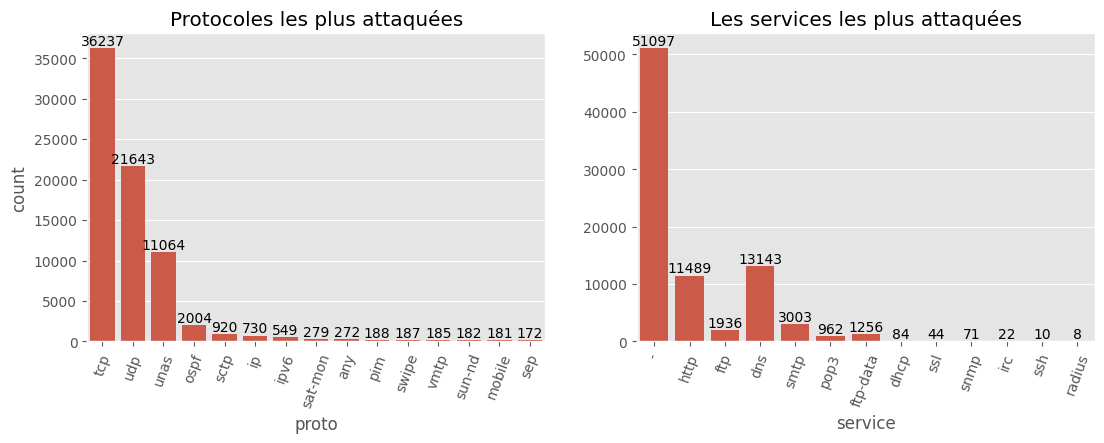

In [17]:
# Dessinons la distribution des modalités des protocoles et services les plus attaqués
plt.figure(figsize=(13, 4))

plt.subplot(121)
x = train_df[train_df.label==1]["proto"].value_counts()[0:20].index
data = train_df[train_df.label==1]["proto"].value_counts()[0:20].values
ax = sns.barplot(x="proto", y="count", data=train_df[train_df.label==1]["proto"].value_counts()[0:15].to_frame().reset_index())
ax.bar_label(ax.containers[0])
ax.tick_params(axis='x', labelrotation=70)
ax.set_title("Protocoles les plus attaquées")

plt.subplot(122)
ax = sns.countplot(x="service", data=train_df[train_df.label==1])
ax.bar_label(ax.containers[0])
ax.set_title("Les services les plus attaquées")
ax.tick_params(axis='x', labelrotation=70)
ax.set_ylabel(None)

plt.savefig("attaquees.pdf", dpi=500, facecolor="w", bbox_inches="tight")
plt.show()

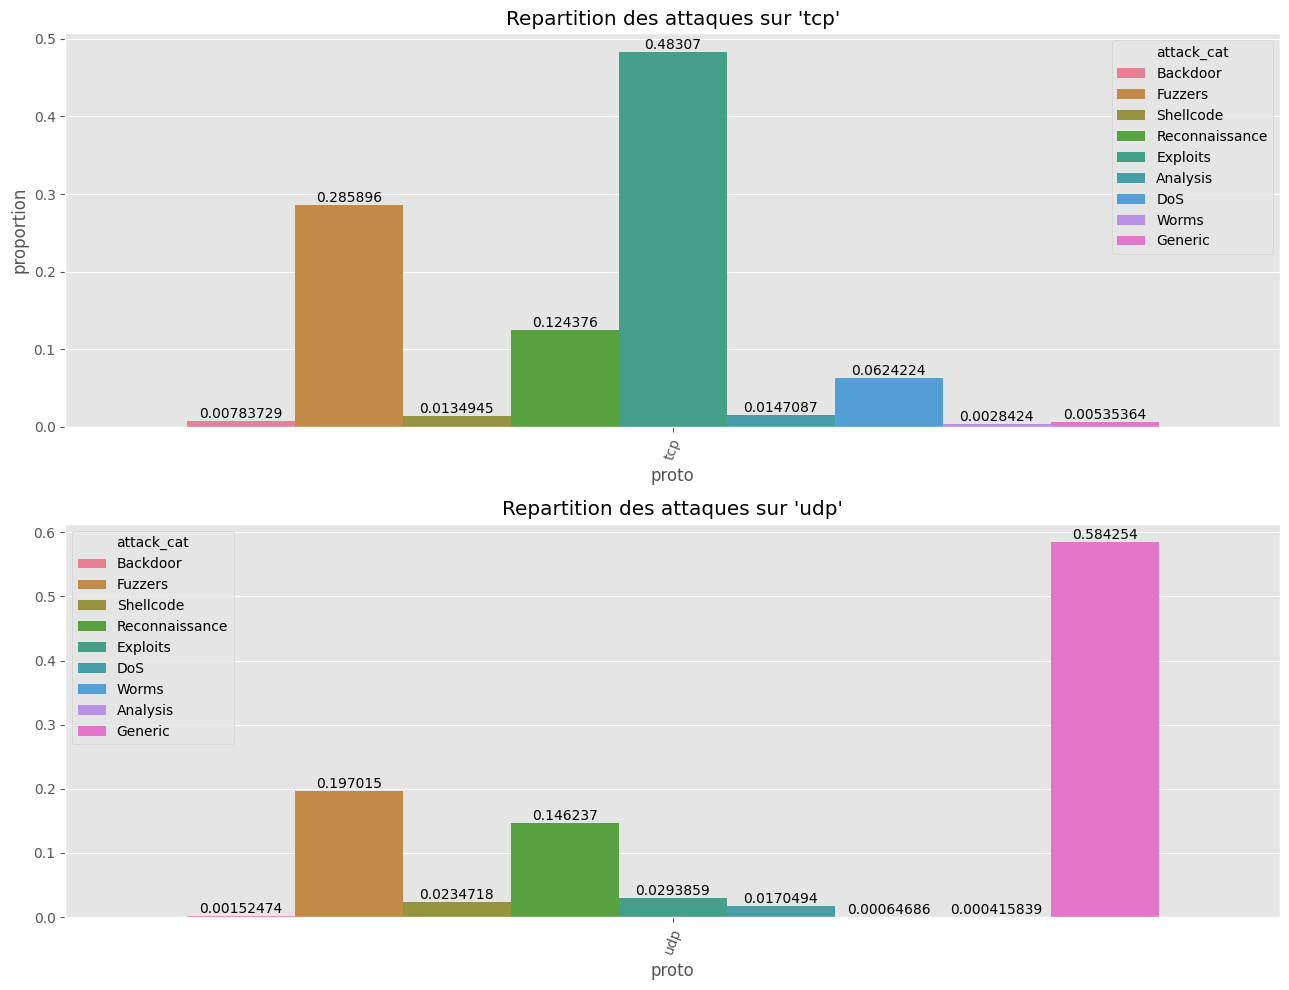

In [18]:
# Dessinons la distribution des attaques sur les protocoles "tcp" et "udp"
plt.figure(figsize=(13, 10))

plt.subplot(211)
tmp = train_df[(train_df.label==1) & (train_df.proto.isin(["tcp"]))]
ax = sns.countplot(x="proto", data=tmp, hue="attack_cat", stat='proportion')
for i in range(0, len(ax.containers)):
    ax.bar_label(ax.containers[i])
ax.tick_params(axis='x', labelrotation=70)
ax.set_title("Repartition des attaques sur 'tcp'")

plt.subplot(212)
tmp = train_df[(train_df.label==1) & (train_df.proto.isin(["udp"]))]
ax = sns.countplot(x="proto", data=tmp, hue="attack_cat", stat='proportion')
for i in range(0, len(ax.containers)):
    ax.bar_label(ax.containers[i])
ax.set_title("Repartition des attaques sur 'udp'")
ax.tick_params(axis='x', labelrotation=70)
ax.set_ylabel(None)

plt.tight_layout()
plt.savefig("repartition.pdf", dpi=500, facecolor="w", bbox_inches="tight")
plt.show()

## 2. Prepare Data

In [19]:
# Supprimons les exemples qui possèdent les valeurs manquantes au niveau de la variable réponse "attack_cat"
train_df = train_df[~train_df.attack_cat.isna()]
test_df = test_df[~test_df.attack_cat.isna()]

In [20]:
# Supprimons la variable réponse "label" car le but n'est pas de faire une classification binaire
train_df = train_df.drop("label", axis=1)
test_df = test_df.drop("label", axis=1)

In [21]:
# Remplacons les modalités qui n'ont pas de sens par "inconnu"
mapping = {"a/n":"unknow", "-":"unknow", "any":"unknow", "no":"unknow"}
train_df = train_df.replace(mapping)
test_df = test_df.replace(mapping)

### Transformation

In [22]:
# Encodons les variables catégorielles
for col in ["proto", "service", "state"]:
    train_df[col] = LabelEncoder().fit_transform(train_df[col])
    test_df[col] = LabelEncoder().fit_transform(test_df[col])

In [23]:
# Normalisons les variables numériques
cols = train_df.columns.difference(["id", "proto", "service", "state", "attack_cat"])
for col in cols:
    train_df[col] = MinMaxScaler().fit_transform(train_df[col].values.reshape(-1,1))
    test_df[col] = MinMaxScaler().fit_transform(test_df[col].values.reshape(-1,1))

### Features Selection

In [24]:
# Modèle de Boosting pour sélectionner les variables les plus importantes
from lightgbm import LGBMClassifier

In [25]:
main_cols = train_df.columns.difference(["attack_cat", "id"]) 
X = train_df[main_cols]
y = train_df["attack_cat"]

selector = LGBMClassifier(n_estimators=500, random_state=SEED, class_weight="balanced").fit(X, y.values)

In [26]:
# Capturons les variables et leur importance
feat_df = pd.DataFrame({"features":selector.feature_name_, "importances":selector.feature_importances_})
feat_df = feat_df.sort_values('importances', ascending=False)
feat_df["importances"] = feat_df["importances"] / feat_df["importances"].max()

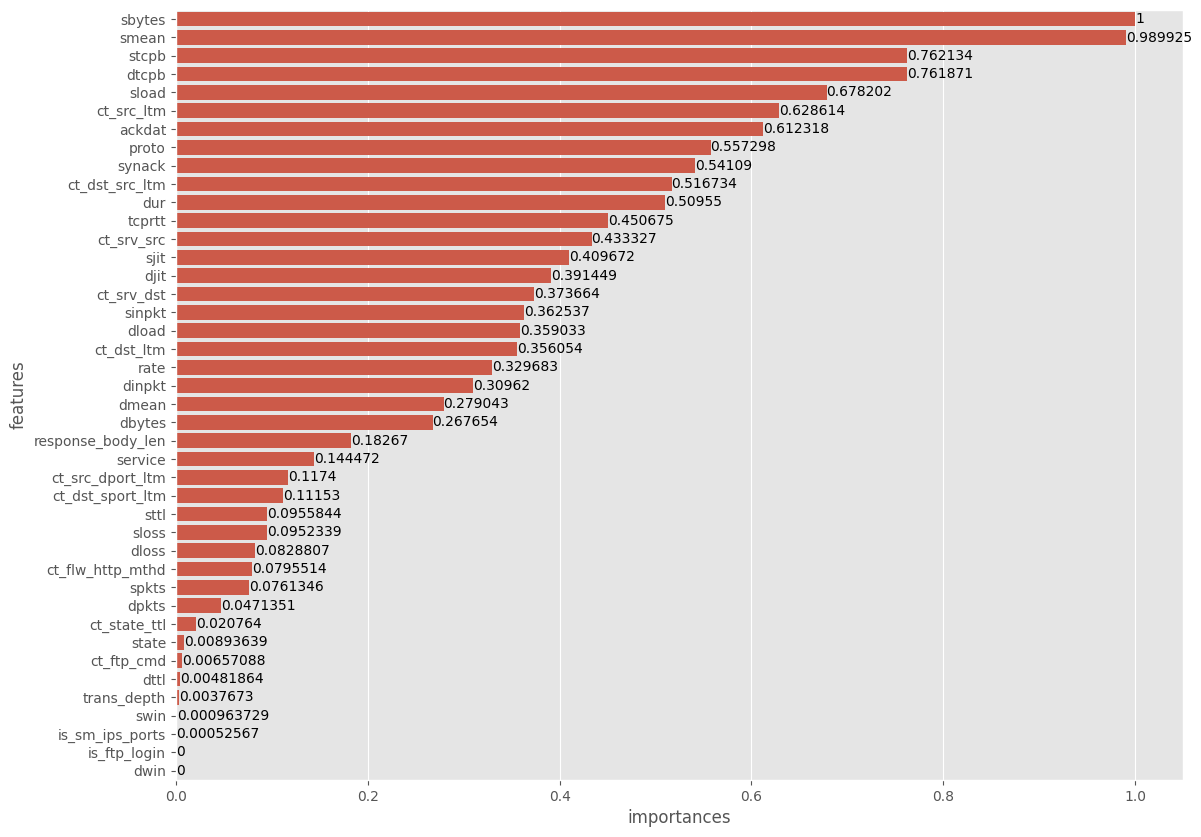

In [27]:
# Diagramme en bâtons des variables et de leur importance
plt.figure(figsize=(13, 10))
ax = sns.barplot(x="importances", y="features", data=feat_df)
ax.bar_label(ax.containers[0])
plt.savefig("feat_impo.pdf", dpi=500, facecolor="w", bbox_inches="tight")
plt.show()

In [28]:
# Sélectionnons les variables dont l'importance est inférieur à 0.1 
cols_todel = feat_df[feat_df.importances<0.1]['features'].values
cols_todel

array(['sttl', 'sloss', 'dloss', 'ct_flw_http_mthd', 'spkts', 'dpkts',
       'ct_state_ttl', 'state', 'ct_ftp_cmd', 'dttl', 'trans_depth',
       'swin', 'is_sm_ips_ports', 'is_ftp_login', 'dwin'], dtype=object)

In [29]:
# Supprimons ces variables là dont l'importance < 1
train_df.drop(cols_todel, axis=1, inplace=True)
test_df.drop(cols_todel, axis=1, inplace=True)

In [30]:
# L'entête de la BD de training prétraitée
train_df.head()

,id,dur,proto,service,sbytes,dbytes,rate,sload,dload,sinpkt,dinpkt,sjit,djit,stcpb,dtcpb,tcprtt,synack,ackdat,smean,dmean,response_body_len,ct_srv_src,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst,attack_cat
0,1,0.002025,90,12,0.000018,0.000012,0.000074,2.364553e-06,0.000379,0.000288,0.000148,0.000021,0.000041,0.144768,0.512828,0.000000,0.000000,0.000000,0.010163,0.029492,0.0,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.000000,Normal
1,2,0.010832,90,12,0.000054,0.002867,0.000078,1.401989e-06,0.022458,0.000592,0.000272,0.000042,0.004796,0.330128,0.716524,0.000000,0.000000,0.000000,0.016260,0.758573,0.0,0.677419,0.00,0.00,0.0,0.015625,0.000000,0.081967,Normal
2,3,0.027052,90,12,0.000026,0.000900,0.000014,2.625704e-07,0.002717,0.002748,0.001811,0.011763,0.039466,0.492706,0.689918,0.044423,0.029261,0.033164,0.012195,0.565158,0.0,0.096774,0.02,0.00,0.0,0.031250,0.016949,0.081967,Normal
3,4,0.028027,90,2,0.000046,0.000053,0.000014,4.576117e-07,0.000150,0.001812,0.001591,0.000177,0.017249,0.257772,0.243882,0.000000,0.000000,0.000000,0.016260,0.043896,0.0,0.000000,0.02,0.00,0.0,0.031250,0.016949,0.000000,Normal
4,5,0.007491,90,12,0.000039,0.000018,0.000033,1.429776e-06,0.000178,0.000566,0.001334,0.001654,0.000400,0.567209,0.460351,0.050967,0.033874,0.037632,0.016938,0.030864,0.0,0.677419,0.02,0.02,0.0,0.609375,0.016949,0.622951,Normal


In [31]:
# L'entête de la BD de testing prétraitée
test_df.head()

,id,dur,proto,service,sbytes,dbytes,rate,sload,dload,sinpkt,dinpkt,sjit,djit,stcpb,dtcpb,tcprtt,synack,ackdat,smean,dmean,response_body_len,ct_srv_src,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst,attack_cat
0,1,1.833334e-07,92,12,0.000033,0.0,0.090909,0.034238,0.0,1.833028e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151351,0.0,0.0,0.016129,0.000000,0.000000,0.0,0.016129,0.000000,0.016393,Normal
1,2,1.333334e-07,92,12,0.000121,0.0,0.125000,0.167236,0.0,1.333111e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.579054,0.0,0.0,0.016129,0.000000,0.000000,0.0,0.016129,0.000000,0.016393,Normal
2,3,8.333335e-08,92,12,0.000073,0.0,0.200000,0.162187,0.0,8.331946e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.344595,0.0,0.0,0.032258,0.000000,0.000000,0.0,0.032258,0.000000,0.032787,Normal
3,4,1.000000e-07,92,12,0.000061,0.0,0.166667,0.113895,0.0,9.998335e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.287838,0.0,0.0,0.032258,0.017241,0.017241,0.0,0.032258,0.016949,0.032787,Normal
4,5,1.666667e-07,92,12,0.000146,0.0,0.100000,0.161427,0.0,1.666389e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.702027,0.0,0.0,0.032258,0.017241,0.017241,0.0,0.032258,0.016949,0.032787,Normal


In [32]:
# Sauvegardons nos données prétraitées. On peut maintenant les passer à un modèle de ML.
train_df.to_csv("train_pre.csv", index=False)
test_df.to_csv("test_pre.csv", index=False)